In [5]:
%matplotlib inline

import numpy as np
import pynbody
import pynbody.filt as filt
import pynbody.units as units
import pynbody.analysis.profile as profile
import matplotlib.pyplot as plt
import sys, os, glob, pickle, pylab as plt, struct

In [6]:
def filter_list(data_array):
    res = []
    empty_counter = 0
    for item in data_array:
        if item > 1.5:
            res.append(item)
        else:
            empty_counter += 1
    return res, empty_counter

In [47]:
def load_halos_pickle(pickle_path):
    data = pickle.load( open( pickle_path , "rb" ))
    
    mstar = np.zeros(len(data))
    mvir = np.zeros(len(data))
    sfr = np.zeros(len(data))
    sfr_100 = np.zeros(len(data))
    mgas = np.zeros(len(data))
    print(type(mstar))
    
    for i in range(len(data)):
        gal_dict = data[i]
        
        if gal_dict is not None:
            
            mstar[i] = gal_dict['mstar'] + 1e-12
            mvir[i] = gal_dict['mvir'] + 1e-12
            mgas[i] = gal_dict['mgas'] + 1e-12
            sfr[i] = gal_dict['sfr'] + 1e-12
            sfr_100[i] = gal_dict['sfr_100']+1e-12
        
    return mstar, mvir, mgas, sfr, sfr_100

In [ ]:
pickle_path = "data/60/vol_halo_z9.894.p"
data = pickle.load( open( pickle_path , "rb" ))

In [43]:
print(len(data))
gal_dict = data[119845]
mstar= np.zeros(2)
mstar[1]=data[0]['mstar']

type(gal_dict)

119846


NoneType

In [48]:
mstar, mvir, mgas, sfr, sfr_100 = load_halos_pickle('data/60/vol_halo_z0.205.p')

<class 'numpy.ndarray'>


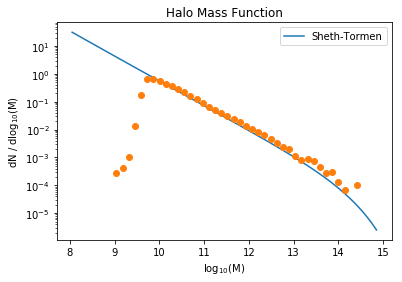

In [53]:
# For Halo Mass

mvir, emp = filter_list(mvir)

h_mhist, h_mbin_edges = np.histogram(np.log10(mvir),bins=40)
h_mbinmps = np.zeros(len(h_mhist))
h_mbinsize = np.zeros(len(h_mhist))

for i in np.arange(len(h_mhist)):
    h_mbinmps[i] = np.mean([h_mbin_edges[i],h_mbin_edges[i+1]])
    h_mbinsize[i] = h_mbin_edges[i+1] - h_mbin_edges[i]

stms, stsig, stmf = pynbody.analysis.halo_mass_function(s)

plt.semilogy(np.log10(stms),stmf,label="Sheth-Tormen")
plt.semilogy(h_mbinmps,h_mhist/(60.0**3)/h_mbinsize,'o')
plt.title("Halo Mass Function")
plt.xlabel('log$_{10}$(M)')
plt.ylabel('dN / dlog$_{10}$(M)')
plt.legend()

64814


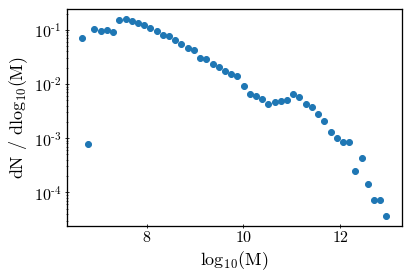

In [19]:
# For Stellar Mass
filter_mstar, count = filter_list(mstar)

s_mhist, s_mbin_edges = np.histogram(np.log10(filter_mstar),bins=50)
s_mbinmps = np.zeros(len(s_mhist))
s_mbinsize = np.zeros(len(s_mhist))

for i in np.arange(len(s_mhist)):
    s_mbinmps[i] = np.mean([s_mbin_edges[i],s_mbin_edges[i+1]])
    s_mbinsize[i] = s_mbin_edges[i+1] - s_mbin_edges[i]

plt.semilogy(s_mbinmps,s_mhist/(60.0**3)/s_mbinsize,'o')
plt.xlabel('log$_{10}$(M)')
plt.ylabel('dN / dlog$_{10}$(M)')

print(count)

Text(0, 0.5, 'dN / dlog$_{10}$(M)')

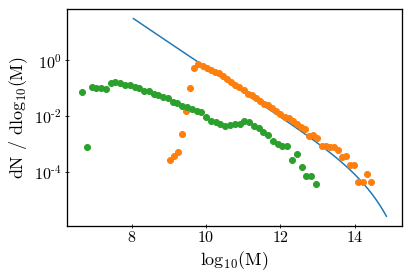

In [35]:
# Both on the same plot

plt.semilogy(np.log10(stms),stmf,label="Sheth-Tormen")
plt.semilogy(h_mbinmps,h_mhist/(60.0**3)/h_mbinsize,'o')
plt.semilogy(s_mbinmps,s_mhist/(60.0**3)/s_mbinsize,'o')
plt.xlabel('log$_{10}$(M)')
plt.ylabel('dN / dlog$_{10}$(M)')

In [45]:
def add_moster(z):
    from pynbody.plot.stars import moster
    
    xm = np.logspace(8.5,13.5,100)
    ym, errors = moster(xm,z)
    
    plt.fill_between(xm,np.array(ym)/np.array(errors),
                    y2=np.array(ym)*np.array(errors),
                    facecolor='gainsboro', edgecolor='gainsboro',zorder=1)
    plt.plot(xm,ym,color='black',ls='--',label='$\\rm Moster\;et\;al.\;2013$')
    return None

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

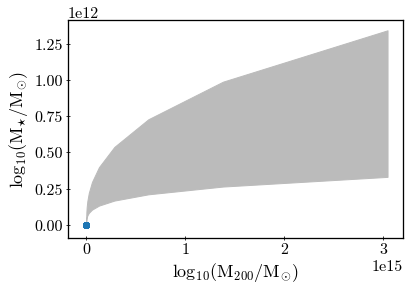

In [78]:
# Mstar vs Mhalo
zred = 0.204

xlabel = '$\\rm{log_{10}}(M_{200}/\\rm M_{\odot})$'
ylabel = '$\\rm{log_{10}}(M_{\star}/\\rm M_{\odot})$'
label = '$z \;=\; {}$'.format(zred)
c = 'steelblue'

plt.figure()
fig, ax = plt.subplots(1,1)
fig.subplots_adjust(hspace=0, wspace=0)
idx = np.where(mstar > 1)

x = np.log10(mvir[idx])

#Moster
from pynbody.plot.stars import moster
xmasses = np.logspace(np.log10(min(mvir)),1+np.log10(max(mvir)),20)
ystarmasses, errors = moster(xmasses,zred)
plt.fill_between(xmasses,np.array(ystarmasses)/np.array(errors),
y2=np.array(ystarmasses)*np.array(errors),facecolor='#BBBBBB',color='#BBBBBB')

plt.scatter(np.log10(mvir[idx]), np.log10(mstar[idx]), marker = 'o',zorder=1)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

Text(0.5, 0, '$\\rm{log_{10}}(M_{200}/\\rm M_{\\odot})$')

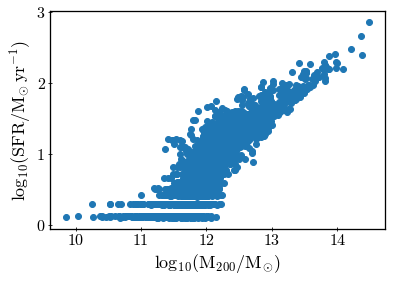

In [38]:
fig, ax = plt.subplots(1,1)
fig.subplots_adjust(hspace=0, wspace=0)
idx = np.where(sfr > 1)

ylabel = '$\\rm{log_{10}(SFR/M_{\odot}\,yr^{-1})}$'
plt.scatter(np.log10(mvir[idx]), np.log10(sfr[idx]),label=label)
plt.ylabel(ylabel)
plt.xlabel(xlabel)

NameError: name 'sfr_200' is not defined

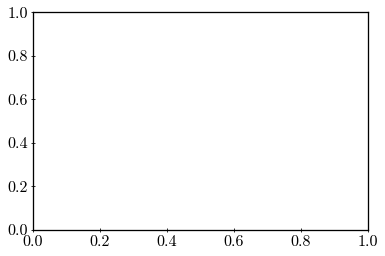

In [69]:
fig, ax = plt.subplots(1,1)
fig.subplots_adjust(hspace=0, wspace=0)
idx = np.where(sfr > 1)

ylabel = '$\\rm{log_{10}(SFR/M_{\odot}\,yr^{-1})}$'
plt.scatter(np.log10(mvir[idx]), np.log10(sfr_100[idx]),label=label)
plt.ylabel(ylabel)
plt.xlabel(xlabel)